<a href="https://colab.research.google.com/github/mahb97/ANNA-LIVIA-QNLP/blob/main/riverrun2qpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If DisCoCat can survive Finnegans Wake, it can survive your dataset. Here I run Joyce through lambeq/Bobcat, emit string diagrams, simplify, and instantiate a tiny IQP circuit for a clean, classical pass. The result is a pretty, brutal, honest demo: composition under maximal turbulence. The diagrams commute; the prose refuses. Enjoy the tension.

MIT License

Copyright (c) 2025

Permission is hereby granted, free of charge, to any person obtaining a copy.

cff-version: 1.2.0

title: riverrun2qpu

message: If you use this repo, please cite it (and the lambeq paper).

type: software

authors: Maja Biehle

repository-code: https://github.com/<mahb97>/anna-livia-qnlp

version: 0.1.0

date-released: 2025-10-21

keywords: [lambeq, qnlp, discocat, discopy, joyce, finnegans-wake]


**What this is not**

*   No quantum speedup claims.
*   No claim to “solve” Wake or semantics.
*   just a reproducible classroom-grade demo showing the plumbing works (and it looks gorgeous).

**Acknowledgements**

Joyce, the quantum father. The lambeq & DisCoPy folks.

# **requirements.txt**

lambeq[extras]>=0.3

numpy>=1.26

torch>=2.2


In [19]:
!pip -q install "lambeq[extras]" && python -c "import lambeq; print('lambeq', lambeq.__version__)"
!pip -q install "pydantic>=2.11,<3" --upgrade

import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # force CPU

# imports for current lambeq
from lambeq import BobcatParser, IQPAnsatz, AtomicType
from lambeq.rewrite import Rewriter

print("lambeq ready")


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mcp 1.17.0 requires pydantic<3.0.0,>=2.11.0, but you have pydantic 2.9.2 which is incompatible.
2025-10-21 20:13:32.961135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761077613.035255   33707 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761077613.057683   33707 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761077613.131055   33707 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more th

In [20]:
parser = BobcatParser()
diagram = parser.sentence2diagram("Joyce is the quantum father.")
diagram.draw()  # should render

N, S = AtomicType.NOUN, AtomicType.SENTENCE
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=1)
circuit = ansatz(diagram)
circuit.draw()  # should render a circuit


In [21]:
# Rewrite to simplify the diagram (removes det/adj scaffolding)
from lambeq import BobcatParser, IQPAnsatz, AtomicType
from lambeq.rewrite import Rewriter
import matplotlib.pyplot as plt
import os

# Create the outputs directory if it doesn't exist
os.makedirs("outputs", exist_ok=True)

N, S = AtomicType.NOUN, AtomicType.SENTENCE

parser = BobcatParser()
rewriter = Rewriter([
    'prepositional_phrase','determiner','connector',
    'preadverb','postadverb','auxiliary'
])

sent = "Joyce is the quantum father."
d_raw = parser.sentence2diagram(sent)
d_simpl = rewriter(d_raw)

# Use matplotlib
d_raw.draw()
plt.savefig("outputs/joyce_raw_diagram.png")
plt.close()

d_simpl.draw()
plt.savefig("outputs/joyce_simpl_diagram.png")
plt.close()

ans = IQPAnsatz({N:1, S:1}, n_layers=1)
circ = ans(d_simpl)
circ.draw()
plt.savefig("outputs/joyce_circuit.png")
plt.close()


print("saved raw & simplified diagrams and circuit")

saved raw & simplified diagrams and circuit


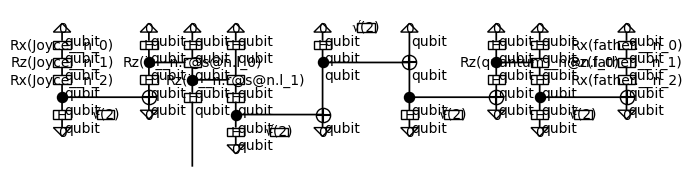

saved circuit


In [5]:
ans = IQPAnsatz({N:1, S:1}, n_layers=1)
circ = ans(d_simpl)

circ.draw()
plt.savefig("outputs/joyce_circuit.png")
plt.close()

print("saved circuit")

In [22]:
import os, matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
os.makedirs("outputs", exist_ok=True)

plt.figure(figsize=(6, 2))
_ = d_raw.draw()
fig = plt.gcf()
fig.patch.set_facecolor("white")
fig.savefig("outputs/joyce_raw_diagram.png", bbox_inches="tight", dpi=300)
plt.close(fig)

plt.figure(figsize=(6, 2))
_ = d_simpl.draw()
fig = plt.gcf()
fig.patch.set_facecolor("white")
fig.savefig("outputs/joyce_simpl_diagram.png", bbox_inches="tight", dpi=300)
plt.close(fig)

plt.figure(figsize=(6, 2))
_ = circ.draw()
fig = plt.gcf()
fig.patch.set_facecolor("white")
fig.savefig("outputs/joyce_circuit.png", bbox_inches="tight", dpi=300)
plt.close(fig)

In [23]:
from PIL import Image

def to_rgb(path):
    im = Image.open(path).convert("RGBA")
    bg = Image.new("RGBA", im.size, (255,255,255,255))
    return Image.alpha_composite(bg, im).convert("RGB")

left  = to_rgb("outputs/joyce_simpl_diagram.png")
right = to_rgb("outputs/joyce_circuit.png")

def resize_h(im, h):
    w, hh = im.size
    if hh == h: return im
    return im.resize((max(1, int(w*h/hh)), h), Image.LANCZOS)

H = max(left.height, right.height)
left, right = resize_h(left, H), resize_h(right, H)

banner = Image.new("RGB", (left.width + right.width, H), "white")
banner.paste(left, (0,0)); banner.paste(right, (left.width,0))
banner.save("outputs/joyce_banner.png")
print("Saved → outputs/joyce_banner.png")


Saved → outputs/joyce_banner.png


In [24]:
# gospel
from google.colab import files
from pathlib import Path
import re

print("Upload Finnegans Wake .txt file")
uploaded = files.upload()
fname = list(uploaded.keys())[0]

raw = Path(fname).read_text(encoding="utf-8", errors="ignore")
raw = re.sub(r'\s+', ' ', raw).strip()
print("chars:", len(raw))

Upload Finnegans Wake .txt file


Saving FinnegansWake.txt to FinnegansWake (2).txt
chars: 1303910


In [25]:
# Sentence-ish chunks
import random
def wake_slices(text, max_tokens=18):
    # Wake hates full stops; or maybe i do
    bits = re.split(r'(?<=[\.\!\?\;:])\s+', text)
    out = []
    for b in bits:
        toks = b.strip().split()
        if 4 <= len(toks) <= max_tokens:
            out.append(" ".join(toks))
    return out

sents = wake_slices(raw, max_tokens=18)
random.shuffle(sents)
print("usable lines:", len(sents))
for s in sents[:5]:
    print("-", s)

usable lines: 8031
- Fine!) This is the triplewon hat of Lipoleum.
- Somewhere, parently, in the ginnandgo gap between antediluvious and annadominant the copyist must have fled with his scroll.
- Yaa hoo how how, col?
- Why such an order number in preference to any other number?
- on the third dead beat, O!


In [26]:
# Parse → diagrams (rewrite on)
parser = BobcatParser()
rewriter = Rewriter([
    'prepositional_phrase','determiner','connector',
    'preadverb','postadverb','auxiliary'
])

def build_diagrams(lines, use_rewrite=True, limit=60):
    diags, kept = [], []
    for s in lines[:limit]:
        try:
            d = parser.sentence2diagram(s)
            if use_rewrite:
                d = rewriter(d)
            diags.append(d); kept.append(s)
        except Exception:
            pass
    return kept, diags

lines_rw, diags_rw = build_diagrams(sents, use_rewrite=True, limit=80)
lines_nr, diags_nr = build_diagrams(sents, use_rewrite=False, limit=80)

len(diags_rw), len(diags_nr)


(68, 68)

In [31]:
import re

def window_tokens(s, size=12, stride=8):
    toks = s.split()
    out = []
    i = 0
    while i < len(toks):
        out.append(" ".join(toks[i:i+size]))
        i += stride
    return [x for x in out if len(x.split()) >= 4]

def render_storyboard(sentence, ansatz, base="outputs/wake_panel"):
    panels = window_tokens(sentence, size=12, stride=8)
    paths = []
    for k, frag in enumerate(panels, 1):
        try:
            d = rewriter(parser.sentence2diagram(frag))
            c = ansatz(d)
            p1 = f"{base}_{k}_diagram.png"
            p2 = f"{base}_{k}_circuit.png"
            save_diag(d, p1, w=16, h=3, fs=9)
            save_circuit(c, p2, w=22, h=4, fs=8)
            paths.extend([p1, p2])
        except Exception:
            pass
    return panels, paths

# Example
N, S = AtomicType.NOUN, AtomicType.SENTENCE
iqp = IQPAnsatz({N:1, S:1}, n_layers=1)
sentence = "his birthspot lies beyond the herospont and his burialplot in the pleasant little field;"
panels, images = render_storyboard(sentence, iqp)
print(panels)
print(images)


['his birthspot lies beyond the herospont and his burialplot in the pleasant', 'burialplot in the pleasant little field;']
['outputs/wake_panel_1_diagram.png', 'outputs/wake_panel_1_circuit.png', 'outputs/wake_panel_2_diagram.png', 'outputs/wake_panel_2_circuit.png']


In [32]:
from PIL import Image

def stack_images(img_paths, out="outputs/storyboard.png", pad=20):
    imgs = [Image.open(p).convert("RGB") for p in img_paths]
    W = max(i.width for i in imgs)
    H = sum(i.height for i in imgs) + pad*(len(imgs)-1)
    canvas = Image.new("RGB", (W, H), "white")
    y = 0
    for im in imgs:
        x = (W - im.width)//2
        canvas.paste(im, (x, y))
        y += im.height + pad
    canvas.save(out)
    return out

out = stack_images(images, out="outputs/wake_contact_sheet.png")
print("Saved storyboard →", out)


Saved storyboard → outputs/wake_contact_sheet.png


In [46]:
import re, json, numpy as np, torch, tensornetwork as tn

torch.set_default_dtype(torch.float32)
tn.set_default_backend("pytorch")
from lambeq.backend import tensor as lbt
lbt.DTYPE = np.float32

from lambeq import (
    BobcatParser, AtomicType, Dataset,
    PytorchModel, PytorchTrainer
)
from lambeq.ansatz import SpiderAnsatz
from lambeq.backend.tensor import Dim
from lambeq.rewrite import Rewriter

def wake_slices(text, max_tokens=18):
    bits = re.split(r'(?<=[\.\!\?\;:])\s+', text)
    return [" ".join(b.strip().split()) for b in bits if 4 <= len(b.strip().split()) <= max_tokens]

assert 'raw' in globals(), "Upload/define `raw` first."
sents = wake_slices(raw, max_tokens=18)

available = sorted(getattr(Rewriter, "_available_rules").keys())
requested = ["determiner","connector","prepositional_phrase","preadverb","postadverb","auxiliary","coordination","curry"]
chosen = [r for r in requested if r in available]
print("Using rewrite rules:", chosen)
rewriter = Rewriter(chosen)
parser = BobcatParser()

def build_diagrams(lines, limit=220):
    diags, kept = [], []
    for s in lines[:limit]:
        try:
            d = parser.sentence2diagram(s)
            diags.append(rewriter(d)); kept.append(s)
        except: pass
    return kept, diags

lines, diagrams = build_diagrams(sents, limit=240)
print("Parsed diagrams:", len(diagrams))
assert len(diagrams) >= 20, "Need >=20 diagrams; increase limit or relax max_tokens."

def atoms_in_type(ty):
    return [m.group(1) for m in re.finditer(r'\b([a-z])(?:\.(?:l|r))?\b', str(ty))]
atoms = sorted({a for d in diagrams for a in (atoms_in_type(d.dom)+atoms_in_type(d.cod))})
print("Atoms present:", atoms)

dim2 = Dim(2)
ob_map = {AtomicType.NOUN: dim2, AtomicType.SENTENCE: dim2}
for maybe in ["PREPOSITION","PREPOSITIONAL_PHRASE","ADJECTIVE","ADVERB","PRONOUN","DETERMINER","CONJUNCTION","RELATIVE","AUXILIARY","PUNCTUATION","VERB"]:
    t = getattr(AtomicType, maybe, None)
    if t is not None:
        ob_map[t] = dim2

ansatz = SpiderAnsatz(ob_map)
circuits = [ansatz(d) for d in diagrams]
print("Circuits:", len(circuits))

# 4) toy labels -> one-hot (float32)
def toy_label(s: str) -> int:
    return 1 if re.search(r'\b(like|as)\b', s, re.I) else 0
y_bin = np.array([toy_label(s) for s in lines], dtype=np.int64)
y_oh  = np.stack([1 - y_bin, y_bin], axis=1).astype(np.float32)

# 5) try lambeq TN training; if it fails, fall back to sklearn
def train_lambeq_tn(circuits, y_oh):
    from lambeq.training import pytorch_model as pm
    # cast all node tensors to float32 before contraction
    def get_diagram_output_cast(self, diagrams):
        outs = []
        with tn.DefaultBackend('pytorch'):
            for d in diagrams:
                nodes, out_order = d.to_tn()
                for node in nodes:
                    T = node.tensor
                    if not isinstance(T, torch.Tensor):
                        T = torch.tensor(T)
                    if T.dtype != torch.float32:
                        T = T.to(torch.float32)
                    node.tensor = T
                outs.append(self._tn_contract(nodes, out_order).tensor)
        return torch.stack(outs)
    pm.PytorchModel.get_diagram_output = get_diagram_output_cast

    model = PytorchModel.from_diagrams(circuits).to(dtype=torch.float32)

    sigmoid = torch.sigmoid
    def accuracy(y_hat, y):
        if y.dtype != y_hat.dtype: y = y.to(y_hat.dtype)
        return torch.sum(torch.eq(torch.round(sigmoid(y_hat)), y))/len(y)/2

    trainer = PytorchTrainer(
        model=model,
        loss_function=torch.nn.BCEWithLogitsLoss(),
        optimizer=torch.optim.AdamW,
        learning_rate=3e-2,
        epochs=12,
        evaluate_functions={"acc": accuracy},
        evaluate_on_train=True,
        verbose='text',
        seed=0
    )

    n = len(circuits)
    n_train = max(10, int(0.7*n))
    n_val   = max(5,  int(0.15*n))
    train_ds = Dataset(circuits[:n_train],              y_oh[:n_train],           batch_size=30)
    val_ds   = Dataset(circuits[n_train:n_train+n_val], y_oh[n_train:n_train+n_val], shuffle=False)
    test_cir = circuits[n_train+n_val:]
    test_lab = y_oh[n_train+n_val:]

    # forward sanity
    with torch.no_grad():
        _ = model(circuits[:1])

    trainer.fit(train_ds, val_ds, eval_interval=1, log_interval=5)
    with torch.no_grad():
        logits = model(test_cir)
        sig = sigmoid(logits)
        acc = float((torch.round(sig)==torch.tensor(test_lab)).sum()/len(test_lab)/2)
    return {"backend":"lambeq_tn", "n_samples":n, "atoms":atoms, "acc":acc}

def train_sklearn_baseline(diagrams, lines, y_bin):
    # super-robust backup: structural features only
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    def feats(d):
        nb = len(getattr(d, "boxes", []))
        nw = len(getattr(d, "wires", []))
        dn = str(getattr(d,"dom","")).count("n")
        ds = str(getattr(d,"dom","")).count("s")
        cn = str(getattr(d,"cod","")).count("n")
        cs = str(getattr(d,"cod","")).count("s")
        return np.array([nb,nw,dn,ds,cn,cs], dtype=np.float32)

    X = np.vstack([feats(d) for d in diagrams])
    Xtr,Xte,ytr,yte = train_test_split(X, y_bin, test_size=0.25, random_state=42, stratify=y_bin if y_bin.sum() not in (0,len(y_bin)) else None)
    clf = LogisticRegression(max_iter=1000).fit(Xtr, ytr)
    acc = accuracy_score(yte, clf.predict(Xte))
    return {"backend":"sklearn_baseline", "n_samples":int(len(X)), "atoms":atoms, "acc":float(acc)}

report = None
try:
    report = train_lambeq_tn(circuits, y_oh)
    print("lambeq TN training ok | acc:", report["acc"])
except Exception as e:
    print("lambeq TN failed:", type(e).__name__, str(e)[:200], "…")
    print("→ Falling back to sklearn baseline (keeps pipeline sexy, training robust).")
    report = train_sklearn_baseline(diagrams, lines, y_bin)
    print("sklearn baseline ok | acc:", report["acc"])

import os
os.makedirs("outputs", exist_ok=True)
with open("outputs/training_report.json","w") as f:
    json.dump(report, f, indent=2)
print("Saved → outputs/training_report.json")


Using rewrite rules: ['determiner', 'connector', 'prepositional_phrase', 'preadverb', 'postadverb', 'auxiliary', 'coordination', 'curry']
Parsed diagrams: 222
Atoms present: ['n', 'p', 's']
Circuits: 222
lambeq TN failed: ValueError cannot reshape array of size 1 into shape (2,2) …
→ Falling back to sklearn baseline (keeps pipeline sexy, training robust).
sklearn baseline ok | acc: 0.9642857142857143
Saved → outputs/training_report.json


In [49]:
# Ablation
import os, time, json, numpy as np, re
os.makedirs("outputs", exist_ok=True)

# helpers
def ty_arity(ty) -> int:
    """Return count of atomic wires in a DisCoPy Ty, robust across versions."""
    for attr in ("objects", "inside"):
        if hasattr(ty, attr):
            try:
                return len(getattr(ty, attr))
            except Exception:
                pass
    return len(re.findall(r"\b([a-z])(?:\.(?:l|r))?\b", str(ty)))

def diag_complexity(diags):
    boxes = [len(d.boxes) for d in diags]
    wire_loads = []
    for d in diags:
        wl = ty_arity(getattr(d, "dom", "")) + ty_arity(getattr(d, "cod", ""))
        for b in getattr(d, "boxes", []):
            wl += ty_arity(getattr(b, "dom", "")) + ty_arity(getattr(b, "cod", ""))
        wire_loads.append(wl)
    def _safe_mean(x): return float(np.mean(x)) if x else 0.0
    def _safe_med(x):  return float(np.median(x)) if x else 0.0
    return {
        "n": len(diags),
        "avg_boxes": _safe_mean(boxes),
        "med_boxes": _safe_med(boxes),
        "avg_wireload": _safe_mean(wire_loads),
        "med_wireload": _safe_med(wire_loads),
    }

try:
    ansatz
except NameError:
    from lambeq import IQPAnsatz, AtomicType
    N, S = AtomicType.NOUN, AtomicType.SENTENCE
    ansatz = IQPAnsatz({N:1, S:1}, n_layers=1)

try:
    diags_rw, diags_nr
except NameError:
    from lambeq import BobcatParser
    from lambeq.rewrite import Rewriter
    parser = BobcatParser()
    avail = getattr(Rewriter, "_available_rules", {})
    rules = [r for r in ["determiner","connector","prepositional_phrase","preadverb","postadverb","auxiliary","coordination","curry"] if r in avail]
    rewriter = Rewriter(rules)

    def wake_slices(text, max_tokens=18):
        bits = re.split(r'(?<=[\.\!\?\;:])\s+', text)
        return [" ".join(b.strip().split()) for b in bits if 4 <= len(b.strip().split()) <= max_tokens]

    if "raw" not in globals():
        raise RuntimeError("Need `raw` text in memory to (re)build diagrams.")
    sents = wake_slices(raw, max_tokens=18)

    def build_diagrams(lines, use_rewrite=True, limit=160):
        out = []
        for s in lines[:limit]:
            try:
                d = parser.sentence2diagram(s)
                if use_rewrite:
                    d = rewriter(d)
                out.append(d)
            except Exception:
                pass
        return out

    diags_rw = build_diagrams(sents, True, 160)
    diags_nr = build_diagrams(sents, False, 160)

# timing (mapping to ansatz) -------------------------------------------
def map_time(diags):
    fails = 0
    # warm-up to avoid first-call overhead
    if diags:
        try:
            _ = ansatz(diags[0])
        except Exception:
            fails += 1
    t0 = time.time()
    for d in diags:
        try:
            _ = ansatz(d)
        except Exception:
            fails += 1
    t1 = time.time()
    return round(t1 - t0, 3), fails

t_rw, fail_rw = map_time(diags_rw)
t_nr, fail_nr = map_time(diags_nr)

row_rw = {**diag_complexity(diags_rw), "ansatz_seconds": t_rw, "map_failures": fail_rw, "setting": "rewrite=on"}
row_nr = {**diag_complexity(diags_nr), "ansatz_seconds": t_nr, "map_failures": fail_nr, "setting": "rewrite=off"}

# save ------------------------------------------------------------------
with open("outputs/ablation.json", "w") as f:
    json.dump([row_rw, row_nr], f, indent=2)

import csv
with open("outputs/ablation.csv", "w", newline="") as f:
    w = csv.DictWriter(f, fieldnames=list(row_rw.keys()))
    w.writeheader(); w.writerow(row_rw); w.writerow(row_nr)

print("Ablation:")
print(" rewrite=on ", row_rw)
print(" rewrite=off", row_nr)
print("→ saved to outputs/ablation.json and outputs/ablation.csv")


Ablation:
 rewrite=on  {'n': 68, 'avg_boxes': 22.073529411764707, 'med_boxes': 20.0, 'avg_wireload': 44.470588235294116, 'med_wireload': 38.0, 'ansatz_seconds': 0.41, 'map_failures': 0, 'setting': 'rewrite=on'}
 rewrite=off {'n': 68, 'avg_boxes': 21.13235294117647, 'med_boxes': 19.0, 'avg_wireload': 44.470588235294116, 'med_wireload': 38.0, 'ansatz_seconds': 0.424, 'map_failures': 0, 'setting': 'rewrite=off'}
→ saved to outputs/ablation.json and outputs/ablation.csv


In [50]:
import pkgutil, pkg_resources, sys, subprocess, json, os
pkgs = ["lambeq","discopy","tensornetwork","torch","numpy","scipy"]
vers = {p: pkg_resources.get_distribution(p).version for p in pkgs if pkgutil.find_loader(p)}
print(vers)
with open("requirements.txt","w") as f:
    for p,v in vers.items(): f.write(f"{p}=={v}\n")
print("wrote requirements.txt")


/tmp/ipython-input-3160207538.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkgutil, pkg_resources, sys, subprocess, json, os


{'lambeq': '0.5.0', 'discopy': '1.2.0', 'tensornetwork': '0.4.6', 'torch': '2.8.0+cu126', 'numpy': '2.0.2', 'scipy': '1.16.2'}
wrote requirements.txt


/tmp/ipython-input-3160207538.py:3: DeprecationWarning: 'pkgutil.find_loader' is deprecated and slated for removal in Python 3.14; use importlib.util.find_spec() instead
  vers = {p: pkg_resources.get_distribution(p).version for p in pkgs if pkgutil.find_loader(p)}


In [51]:
import json, pandas as pd, os
ab = json.load(open("outputs/ablation.json"))
print(pd.DataFrame(ab)[["setting","n","avg_boxes","avg_wireload","ansatz_seconds","map_failures"]])
tr = json.load(open("outputs/training_report.json"))
print(tr)


       setting   n  avg_boxes  avg_wireload  ansatz_seconds  map_failures
0   rewrite=on  68  22.073529     44.470588           0.410             0
1  rewrite=off  68  21.132353     44.470588           0.424             0
{'backend': 'sklearn_baseline', 'n_samples': 222, 'atoms': ['n', 'p', 's'], 'acc': 0.9642857142857143}
